The story:
A bank is investigating a very high rate of customer leaving the bank. Here is a 10.000 records dataset to investigate and predict which of the customers are more likely to leave the bank soon

* [i. Loading Libraries](#A) <br>
* [ii. Importing data](#B) <br>
* [1.Dropping unnecessary columns](#1) <br>
* [2.Variable Analysis](#2) <br>
    * [2.1. Categorical Variables](#2.1) <br>
    * [2.2. Numerical Variables](#2.1) <br>
* [3.Basic Data Analysis](#3) <br>
    * [3.1. Seaborn Count Plot](#3.1) <br>
    * [3.2. Outlier Detection](#3.2) <br>
* [4.Visualisation](#4) <br>
* [5.Machine Learning](#5) <br>
    * [5.1. Modelling](#5.1) <br>
    * [5.2. Logistic Regression](#5.2) <br>
    * [5.3. Classification with KNN (K Neirest Neighbour)](#5.3) <br>
    * [5.4. Classification with SVM (Support Vector Machine)](#5.4) <br>
    * [5.5. Classification with Naive Bayes](#5.5) <br>
    * [5.6. Classification with Decision Tree](#5.6) <br>
    * [5.7. Classification with Random Forest](#5.7) <br>
    * [5.8. K-Fold Cross Validation (cross_val_score)](#5.8) <br>
    * [5.9. Grid Search Cross Validation (GridSearchCV)](#5.9) <br>
    * [5.10. Voting Classifier](#5.10) <br>
    * [5.11. Hyperparameter tuning -- Grid Search -- Cross Validation](#5.11) <br>
    * [5.12. Ensemble Modelling](#5.12) <br>

<a id="A"></a>
## i. Loading Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="B"></a>
## ii. Importing data

In [ ]:
# Read data
data = pd.read_csv("/kaggle/input/deep-learning-az-ann/Churn_Modelling.csv")

In [ ]:
# First 10 rows of data
data.head(10)

In [ ]:
# Statistical infos on data
data.describe()

In [ ]:
# Checking types and nulls
data.info()

* From above, we understood that there is no missing value in columns.
* There are 10000 items and each columns has 10000 non-null items.
* We can check missing value also by isnull() method as below:

In [ ]:
data.isnull().any()

<a id="1"></a>
## 1. Dropping unnecessary columns

In [ ]:
data.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

In [ ]:
# Check data
data.head()

<a id="2"></a>
# 2.VARIABLE ANALYSIS

### Categorical Variables:
* Geography
* Gender	
* HasCrCard	
* IsActiveMember	
* Exited
* NumOfProducts

### Numerical Variables: 
* CreditScore	
* Age	
* Tenure	
* Balance	
* EstimatedSalary

<a id="2.1"></a>
## 2.1. CATEGORICAL VARIABLES

## Defining a function named as "bar_plot()"

* In order to analyze categorical variables, i will plot bar charts.
* I will define a function:
* bar_plot function takes a variable as input
* Will output a bar chart showing variable @ x axis and counts @ y axis.
* Also percentage of the varible count will be shown on bars.

In [ ]:
def bar_plot(variable):
    """
    Takes a variable as an input: For example "Gender"
    Outputs a bar plot and counts value
    """
    
    # creating a temporary data frame for stroring index and values
    df = pd.DataFrame({
        variable : data[variable].value_counts().sort_values().index, # getting index after counting values and sorting as ascending
        "Count": data[variable].value_counts().sort_values().values # getting values 
                     }) 
    
    # creating bar plot as a subplot defines as "ax"
    ax = df.plot(
            kind = "bar",
            x = variable,
            y = "Count",
            edgecolor="black",
            legend = False,       
            figsize = (3,3)
                )
    
    # showing percentage on bars 
    
    heights = []  # empty list for storing height of bar of each index item
    
    for patch in ax.patches:                  # loop for getting heights of each bar in ax subplot
        heights.append(patch.get_height())    # gets height of each bar or patch and add to list of heights
    
    for patch in ax.patches:                  # loop for showing percentage on bars
        ax.text(
            patch.get_x(),                    # x position of text
            patch.get_height()-350,           # y poisition of text
            "%" + str(round(patch.get_height() / sum(heights)*100)),  # text to be shown
            fontsize = 11,                     # fontsize of text
            color = "yellow"                   # color of text
         
        )
    # some explanation for plot
    
    plt.xticks(rotation = 0, fontsize = 10)
    plt.ylabel("Count", color="r", fontsize="10")
    plt.xlabel(variable, color="r", fontsize="10")
    plt.title(variable, fontsize="14", color = "r")
    plt.grid(axis="both", color="gray", linewidth=0.3)    # shows grid lines on plot
    plt.show()    

In [ ]:
# defining a list contains the categorical variables
categoricals = ["Geography","Gender","HasCrCard","IsActiveMember","Exited","NumOfProducts"]

for each in categoricals:
    bar_plot(each)

### Comments on bar plots:
* %51 of the customers have only 1 product, %46 have 2 products, %3 has 3 and %1 has 4 products.
* %20 of the customers left the bank
* %52 of the customers are active member
* %71 of the customers have credit cards
* %55 of the customers are male
* %50 of the customers from France, %25 from Germany, %25 from Spain. 

<a id="2.2"></a>
## 2.2. NUMERICAL VARIABLES

## Defining a function named as "hist_plot()"

* In order to analyze numerical variables i will plot histograms.
* For this purpose, i will plot histograms of all num. variables at once.
* Function takes variable as an input and outputs hist plot.

In [ ]:
# defining function to plot histogram
def hist_plot(variable):
    data[variable].plot(
        kind = "hist",
        bins = 50,
        figsize = (4,3),
        edgecolor = "black"
                        )
    
    plt.xticks(rotation = 0, fontsize = 10)
    plt.xlabel(variable, color="r", fontsize="10")
    plt.title("Frequency of {}".format(variable), fontsize="14", color = "r")
    plt.grid(axis="both", color="gray", linewidth=0.3)    # shows grid lines on plot
    plt.show()

In [ ]:
numericals = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
for each in numericals:
    hist_plot(each)

### Comments on histogram plots:
* There are roughly 3500 accounts having zero balance, those are tend to be leaving.

<a id="3"></a>
## 3. BASIC DATA ANALYSIS

Below pairs to be analyzed:
* Geography - Exited
* Gender - Exited	
* HasCrCard	- Exited
* IsActiveMember - Exited	
* NumOfProducts - Exited

<a id="3.1"></a>
## 3.1. Seaborn Count Plot

### Defining a function named as "count_plot()"

* Function takes variable as an input
* Outputs countplot and percentage of varible
* I will use groupby method to calculate percentages

In [ ]:
def count_plot(variable):
    plt.subplots(figsize=(4,3))   # creates subplots
    sns.countplot(
        x = variable,
        hue = "Exited",
        data = data,
            )
    plt.show()  

    # percentage calculation

    counts = data[data.Exited == 1].groupby(variable)["Exited"].count() 
    sums = data.groupby(variable)["Exited"].count()
    print("Percentage of Exited customers:")
    for i in range (counts.shape[0]):
        print(counts.index[i],"%",round(counts[i]/sums[i]*100))


In [ ]:
count_plot("Geography")

#### Germany is the country where people mostly exited the bank with %32.

In [ ]:
count_plot('Gender')

#### Female customers tend to leave the bank in a higher rate then males.

In [ ]:
count_plot('HasCrCard')

#### We can say that not having cr card does not have a big effect on leaving the bank.

In [ ]:
count_plot('IsActiveMember')

#### Not active members tend to leave the bank.

<a id="3.2"></a>
## 3.2. OUTLIER DETECTION

* I will detect outliers : Outlier is a data point that differs significantly from other observations
* Afterwards i will delete the outliers from data.
* In order to see the outliers at a glance, i will use box plot first.

In [ ]:
data.plot(kind="box", figsize=(14,3))
plt.show()

* Above box plot is not clear, features that have values between 0-1 seems to be all same.
* Due to data has small values and big values.
* I will normalize some features of the data and plot the box again.
* Values of normalized features to be between 0 and 1.

In [ ]:
new_data = data.copy()  # make a copy of data

# definign a function that normalizes selected feature of a selected data

def normalize_feature(variable, data1):
    data1[variable] = (data1[variable] - np.min(data1[variable]))/(np.max(data1[variable] - np.min(data1[variable])))

In [ ]:
# Normalizing some features in a for loop:
for each in ['CreditScore','Age', 'Tenure', 'Balance','EstimatedSalary']:
    normalize_feature(each, new_data)

* Box plot of normalized data:

In [ ]:
new_data.plot(kind="box",figsize=(14,4))
plt.show()

* We can see that features of "CreditScore" and "Age" have outliers.
* According to plot, features "NumOfProdcuts" and "Exited" seems to have outliers but they dont due to they are categoricals.
* I will detect and delete the outliers from data
* For detection, i will define a function that takes dataframe and a feature as inputs
* Output will be a list which contains index numbers of outlier items of related feature  

In [ ]:
def detect_outliers(data,feature):

    # first quartile Q1
    Q1 = np.percentile(data[feature], 25)
    # third quartile Q3
    Q3 = np.percentile(data[feature], 75)
    # IQR = Q3 - Q1
    IQR = Q3 - Q1
    # outlier step = IQR x 1.5
    outlier_step = IQR*1.5
    # outliers = Q1 - outlier step or Q3 + outlier_step 
    outliers = (data[feature] < Q1 - outlier_step) |(data[feature]>Q3 + outlier_step) 
    # detect indeces of outliers in features of df
    outlier_indexes= list(data[outliers].index)
    return outlier_indexes

* Now i will detect the outliers for feature "CreditScore" and "Age"

In [ ]:
outliers_CreditScore = detect_outliers(data,"CreditScore")
print("There are {} rows which are outliers in CreditScore column".format(len(outliers_CreditScore)))

In [ ]:
outliers_Age = detect_outliers(data,"Age")
print("There are {} rows which are outliers in Age column".format(len(outliers_Age)))

* From above coding: we saw that there are outliers in two columns.
* I want to delete the rows that have outliers more than 1.
* For example, we have two columns that have outliers; i want to find the rows that have outliers in both 2 columns.
* For this purpose:
* I will combine the two list that have outliers for 2 columns.
* I will count the items with collections.Counter() method** if an item exist in both lists.

In [ ]:
import collections
outliers = collections.Counter((outliers_CreditScore + outliers_Age))

multiple_outliers = list()
for i,v in outliers.items():
    if v > 1:
        multiple_outliers.append(i)

if len(multiple_outliers) == 0:
    print("There is no row that has multiple outliers")
else:
    print("There are {} rows that have multiple outliers".format(len(multiple_outliers)))

* So from above coding, we understood that there is no row to delete.
* Because there is no multiple outliers.

<a id="4"></a>
## 4. VISUALIZATION

In [ ]:
sns.heatmap(data.corr(), annot = True, fmt = ".2f")
plt.show()

* 30% Positive Corelation exists between Age and Exited features.
* 30% Negative Corelation exists between Balance and NumOfProducts features.
* 12% Positive Corelation exists between Balance and Exited features.
* 16& Negative Corelation exists between IsActiveMember and Exited.

### AGE vs EXITED

In [ ]:
plt.subplots(figsize=(17,4))
ax=sns.countplot(
    x="Age",
    hue = "Exited",
    data = data
    )

ax.set_title("Age vs Exiting Customers", color = "red")
ax.grid(axis = "y", color = "yellow", linewidth = "0.4")
plt.show()

* According to above plot:
* Number of exiting customers increasing paralel with the increase of Age, until the ages of 35-37.
* Because young people working hard, earning money and keeping it in bank accounts.
* There are some exiters but bank is increasing customer numbers with new customers.
* From the Age of 35 to 46-47,customer numbers decreasing while exiting customers increasing.
* Becasue people may be investing their money for their future plans, buying home, car or for business.
* They do not prefer to keep their savings in bank accounts.
* After ages of 46-47, numbers of exiting customer and not exiting customers start decreasing.
* Because people getting older and can not keep earning money, also start to spend for health problems etc.

### AGE vs EXITED vs BALANCE

In [ ]:
sns.catplot(
    data = data,
    x = "Age",
    y = "Balance",
    hue = "Exited",
    kind = "bar",
    height = 3.5,
    aspect = 5
)

plt.title("Age vs Balance mean vs Exited Customers", color = "red")
plt.grid(axis = "y", color = "yellow", linewidth = "0.4")
plt.show()

In [ ]:
sns.pairplot(data[["CreditScore", "Age","Balance","EstimatedSalary","Exited"]])
plt.show()

<a id="5"></a>
# 5. MACHINE LEARNING

## Converting "Geography" and "Gender" to categoricals:
* Geography --> Geography_France  / Geography_Germany / Geography_Spain
* Gender --> Gender_Female  / Gender_Male


In [ ]:
df = data.copy()

In [ ]:
df["Geography"] = df.Geography.astype("category")
df["Gender"] = df.Gender.astype("category")
df = pd.get_dummies(df,columns=["Geography","Gender"])

In [ ]:
df.head()

## Converting "Tenure" and "NumOfProducts" to categorical

In [ ]:
df["Tenure"] = df.Tenure.astype("category")
df["NumOfProducts"] = df.NumOfProducts.astype("category")
df = pd.get_dummies(df, columns=(["Tenure","NumOfProducts"]))

## Converting data types of columns to category

In [ ]:
for each in ["HasCrCard","IsActiveMember","Exited"]:
    df[each] = df[each].astype("category")

In [ ]:
df.info()

In [ ]:
df.head(3)

<a id="5.1"></a>
## 5.1. Modelling

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Train - test split

### Creating X_train:

In [ ]:
X_train = df.drop("Exited", axis = 1)

* Features (CreditScore, Age, Balance, EstimatedSalary) to be normalized:

In [ ]:
for each in ["CreditScore", "Age", "Balance", "EstimatedSalary"]:
    normalize_feature(each, X_train)

In [ ]:
X_train.head(3)

### Creating y_train:

In [ ]:
y_train = df["Exited"]

In [ ]:
print("Length of X_train: ",len(X_train))
print("Shape of X_train: ", X_train.shape)
print("Length of Y_tain: ", len(y_train))
print("Shape of Y_train: ", y_train.shape)

### Splitting X_Train, y_train

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_train, 
    y_train, 
    test_size = 0.33, 
    random_state = 42
)

print("Length of X_train: ",len(X_train))
print("Length of X_test: ",len(X_test))
print("Length of y_train: ",len(y_train))
print("Length of y_test: ",len(y_test))

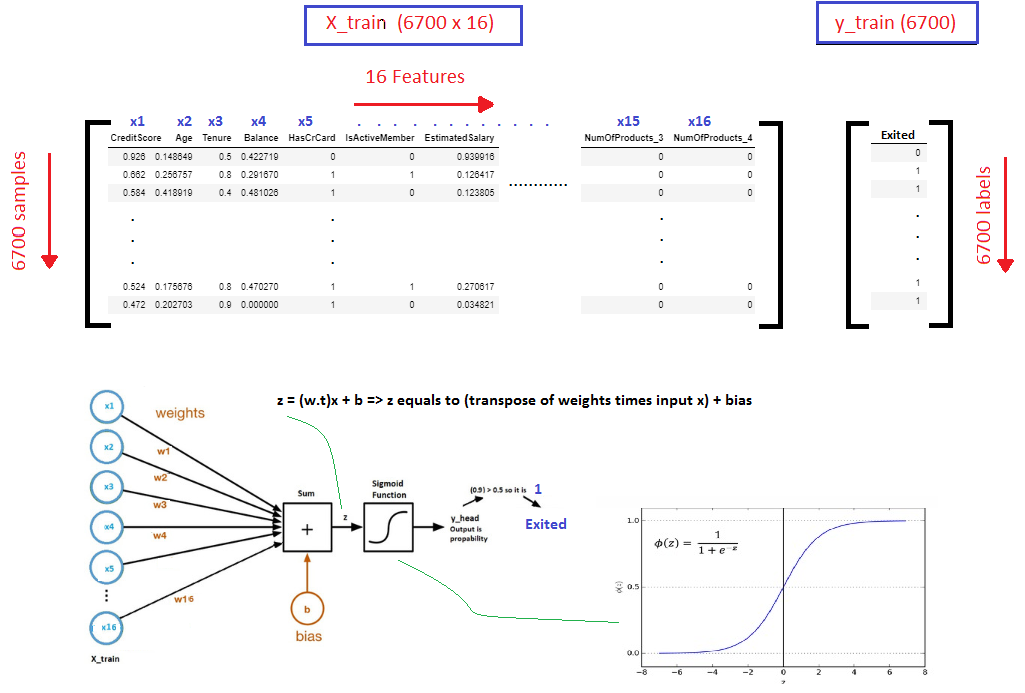

<a id="5.2"></a>
## 5.2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 1)
lr.fit(X_train, y_train)
print("Accuracy with train data: ",round(lr.score(X_train,y_train)*100))
print("Accuracy with test data: ",round(lr.score(X_test, y_test)*100))


<a id="5.3"></a>
## 5.3. Classification with KNN (K Neirest Neighbour)

### Calculation for single n-neighbor

In [ ]:
# Single run for 3-neighbors:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("3-neighbors KNN accuracy with train data: ", round(knn.score(X_train,y_train)*100))
print("3-neighbors KNN accuracy with test data: ", round(knn.score(X_test,y_test)*100))

### Calculation for multiple n-neighbors

In [ ]:
accuracy_list_train = []
accuracy_list_test = []
for each in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train, y_train)
    accuracy_list_train.append(round(knn.score(X_train, y_train)*100))
    accuracy_list_test.append(round(knn.score(X_test, y_test)*100))    

print("Max test accuracy is % {} @ neighbor value of {}".format(
    max(accuracy_list_test),accuracy_list_test.index(max(accuracy_list_test))+1)
     )

In [ ]:
f,ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,20), accuracy_list_train, label="Train accuracy")
ax.plot(range(1,20), accuracy_list_test, label="Test accuracy")
ax.legend()
plt.xlabel("N-neighbor", size = "12", color = "red")
plt.ylabel("Accuracy %", size = "12", color = "red")
plt.title("KNN Classification accuracy vs n-neighbor", size = 12, color = "red")
plt.grid()
plt.show()

<a id="5.4"></a>
## 5.4. Classification with SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

print("SVM accuracy with train data :", svm.score(X_train,y_train))
print("SVM accuracy with test data :", svm.score(X_test, y_test))

<a id="5.5"></a>
## 5.5. Classification with Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("NB accuracy with train data :", nb.score(X_train,y_train))
print("NB accuracy with test data :", nb.score(X_test, y_test))

<a id="5.6"></a>
## 5.6. Classification with Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("DT accuracy with train data :", dt.score(X_train,y_train))
print("DT accuracy with test data :", dt.score(X_test, y_test))

<a id="5.7"></a>
## 5.7. Classification with Random Forest

### RF classification with single n-estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf.fit(X_train, y_train)

print("RF accuracy with train data :", rf.score(X_train,y_train))
print("RF accuracy with test data :", rf.score(X_test, y_test))

### RF classification with multiple n-estimators

In [ ]:
rf_train_accuracy = []
rf_test_accuracy = []

for i in range(1,50):
    rf = RandomForestClassifier(n_estimators = i, random_state = 1)
    rf.fit(X_train, y_train)
    rf.fit(X_test, y_test)
    rf_train_accuracy.append(round(rf.score(X_train, y_train)*100))
    rf_test_accuracy.append(round(rf.score(X_test, y_test)*100))

print("Max test accuracy is % {} @ n_estimator value of {}".format(
    max(rf_test_accuracy),rf_test_accuracy.index(max(rf_test_accuracy))+1)
     )

In [ ]:
f,ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,50), rf_train_accuracy, label="Train accuracy")
ax.plot(range(1,50), rf_test_accuracy, label="Test accuracy")
ax.legend()
plt.xlabel("N-estimator", size = "12", color = "red")
plt.ylabel("Accuracy %", size = "12", color = "red")
plt.title("RF Classification accuracy vs n-estimator", size = 12, color = "red")
plt.grid()
plt.show()

<a id="5.8"></a>
## 5.8. K-Fold Cross Validation (cross_val_score)

#### accuracies = cross_val_score(estimator = knn, X = x_train, y=y_train, cv=10) 

* Algorithm:
1.     1- Split data as train and test datas.
1.     2- Let say k of k-fold is 3, then train data to be splitted into 3.
1.     3- Split each train data into 3 again as train-train-validation.
1.     4- For each 3 splits, data to be trained and validated.
1.     5- There will be 3 accuracy rate for each 3 trains.
1.     6- Get mean of 3 accuracies.
1.     7- Test the model with test split.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("accuracies :",accuracies)
print("mean accuracy :", accuracies.mean())

<a id="5.9"></a>
## 5.9. Grid Search Cross Validation (GridSearchCV)

* It is used to tune hyperparameters.
* Tuned hyperparameter that gives the best accuracy can be detected.
* For example, best k value can be detected for a KNN classifier usig GridSearchCV.
* GridSearchCV(model, grid, cv)  
* Some input parameters are: model--> machine learning model, can be KNeighborsClassifier() etc.
* grid--> Put hyperparameters such as n_neighbrors, n_estimators in a dictionary.
* cv --> can be set as numbers: if it is selected as 5 in a KNN model,
* this means that, for each k value, data to be split into 5 train-validation split.
* and mean accuracy of 5 fold to be calculated for each k value. 

In [ ]:
knn = KNeighborsClassifier()  # machine learning model
grid = {
    "n_neighbors" : [18,19,30],
    "leaf_size" : [1,2,3]
}

knn_gsCV = GridSearchCV(knn, grid, cv = 10, n_jobs = -1, verbose=1)  

knn_gsCV.fit(X_train, y_train)

print("Best parameter(n_neighbor): ", knn_gsCV.best_params_)
print("Best accuracy according to best parameter: ", knn_gsCV.best_score_)

<a id="5.10"></a>
## 5.10. Voting Classifier

In [ ]:
knn_gsCV.best_estimator_

In [ ]:
votingC = VotingClassifier(
    estimators = [("KNN",knn_gsCV.best_estimator_)],
    voting = "soft",
    n_jobs = -1
)

votingC.fit(X_train, y_train)

print("Accuracy score:",votingC.score(X_test, y_test))

<a id="5.11"></a>
## 5.11. Hyperparameter tuning -- Grid Search -- Cross Validation

* Comparing meacn accuracies of 5 ML classification algorithms with grid search and stratified cross validation
* Decision Tree Classifier
* Support Vector Machine
* Random Forest
* KNN
* Logistic Regression

In [ ]:
# Creating list of classifiers that i want to compare
random_state = 42
classifier_list = [
    DecisionTreeClassifier(random_state = random_state),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    LogisticRegression(random_state = random_state),
    KNeighborsClassifier()
]

# Creating grids for tuneable parameters
dt_param_grid = {
    "min_samples_split":range(10,500,20),
    "max_depth": range(1,20,2)
} 

svc_param_grid = {
    "kernel" : ["rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],
    "C": [1,10,50,100,200,300,1000]
}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

# creating list for grids 
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []         # cross validation results to be stacked
best_estimators = []   # best estimators to be stacked

for i in range(5):
    clf = GridSearchCV(
        classifier_list[i],
        param_grid = classifier_param[i],
        cv = StratifiedKFold(n_splits = 10),
        scoring = "accuracy",
        n_jobs = -1,
        verbose = 1
    )
    
    clf.fit(X_train, y_train)
    
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])


In [ ]:
grid_search_results = pd.DataFrame(
    {
        "machine_learning_models": ["Decision Tree","SVC","Random Forest", "Logistic Regression","KNeighbors"],
        "best_accuricies" : cv_result
    }
)

plt.subplots(figsize=(10,8))
plt.bar(
    grid_search_results.machine_learning_models,
    grid_search_results.best_accuricies    
)

plt.xlabel("Machine Learning Models", color = "red", size = 10)
plt.ylabel("Best Accuricies", color = "red", size = 10)
plt.grid(axis = "y",color = "yellow")
plt.title("Grid Search Cross Validation Results")

plt.show()


<a id="5.12"></a>
## 5.12. ENSEMBLE MODELLING

In [ ]:
best_estimators

In [ ]:
votingCls = VotingClassifier(
    estimators = [
        ("dt", best_estimators[0]),
        ("rf",best_estimators[2])    
    ],
    voting = "soft",
    n_jobs = -1
)

votingCls.fit(X_train, y_train)

In [ ]:
print("accuracy score of voting classifier: ", votingCls.score(X_test, y_test))

In [ ]:
votingCls.predict(X_test)